In [228]:
import glob
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

training_path = "F:/Sonstiges/ml/FEMTOBearingDataSet/Learning_set/Bearing1_1"
test_path = "F:/Sonstiges/ml/FEMTOBearingDataSet/Test_set/Bearing1_3"


In [229]:
# import training data

all_files = glob.glob(training_path + "/acc*.csv")

dataFrames = []

for filename in all_files :
    frame = pd.read_csv(filename, header=None)
    dataFrames.append(frame)

rawTrainData = pd.concat(dataFrames)
rawTrainData = rawTrainData.to_numpy()

rawTrainData.shape

(7175680, 6)

In [230]:
# import test data

all_files = glob.glob(test_path + "/acc*.csv")

dataFrames = []

for filename in all_files :
    frame = pd.read_csv(filename, header=None)
    dataFrames.append(frame)

rawTestData = pd.concat(dataFrames)
rawTestData = rawTestData.to_numpy()

rawTestData.shape

(4613120, 6)

In [231]:
def get_time_in_seconds(hour, minute, second, micro_second):
    ret_seconds = hour * 3600  
    ret_seconds += minute * 60
    ret_seconds += second
    ret_seconds += micro_second/1000000
    return ret_seconds

In [232]:
# Considers the first timestamp as '0' and defines the othe timestamps as "seconds since begin"

def assign_timestamps_difference(data):
    begin_time = get_time_in_seconds(hour=data[0,0],minute=data[0,1],second=data[0,2],micro_second=data[0,3])
    list_with_timestamps = []
    print(begin_time)
    for index, obj in enumerate(iterable=data):
        if index > 0:
            seconds = get_time_in_seconds(hour=obj[0],minute=obj[1],second=obj[2],micro_second=obj[3])
            seconds_diff = seconds - begin_time
            list_with_timestamps.append((seconds_diff, obj[4], obj[5]))
        else:
            list_with_timestamps.append((0, obj[4], obj[5]))
    
    arr = np.vstack(list_with_timestamps)
    return arr

In [233]:
# Transforms the timestamps from the dataset into seconds

def assign_timestamps(data):
    list_with_timestamps = []
    for index, obj in enumerate(iterable=data):
        seconds = get_time_in_seconds(hour=obj[0],minute=obj[1],second=obj[2],micro_second=obj[3])
        list_with_timestamps.append((seconds, obj[4], obj[5]))
    
    arr = np.vstack(list_with_timestamps)
    return arr

In [234]:
# This is a modified version of this function that accomodates the different shape of the data

def calculate_difference(data):
    difference_data = []

    for index, obj in enumerate(iterable=data):
        if index > 0:
            diff0 = obj[1] - data[index - 1, 1]
            diff1 = obj[2] - data[index - 1, 2]
            difference_data.append((obj[0],diff0,diff1))
        else:
            difference_data.append((obj[0],obj[1],obj[2]))
    
    difference_array = np.vstack(difference_data)
    difference_array = np.absolute(difference_array)
    return difference_array

In [235]:
# Get timestamps

trainData = assign_timestamps(rawTrainData)
testData = assign_timestamps(rawTestData)

In [236]:
diffTrainData = calculate_difference(data=trainData)
diffTestData = calculate_difference(data=testData)

In [238]:
#Normalise the data to a scale between 0 and 1

normaliser = MinMaxScaler(feature_range=(0,1))
NormTrainData = normaliser.fit_transform(diffTrainData)
NormTestData = normaliser.fit_transform(diffTestData)

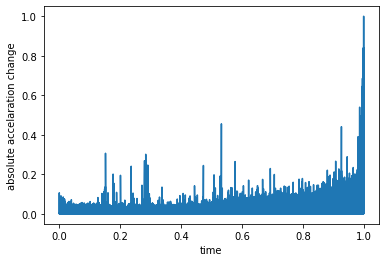

In [239]:
plt.plot(NormTrainData[:, 0],NormTrainData[:,1])
plt.ylabel("abs. horizonzal acc. change")
plt.xlabel("time")
plt.show()

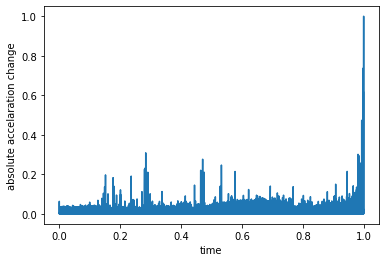

In [240]:
plt.plot(NormTrainData[:, 0],NormTrainData[:,2])
plt.ylabel("abs. vertical acc. change")
plt.xlabel("time")
plt.show()

In [241]:
# prepare data
# 1d array for the x_values needs to be reshaped to a 2d array

x_train = NormTrainData[:,0]
x_train = x_train.reshape(-1,1)

y_train = NormTrainData[:,1:3]

x_test = NormTestData[:,0]
x_test = x_test.reshape(-1,1)
y_test = NormTestData[:,1:3]

In [242]:
# Fit linear regression to difference data
regressor = LinearRegression()

regressor.fit(x_train,y_train)
pred = regressor.predict(x_test)
mse = mean_squared_error(y_test,pred)

print("Mean squared error:", mse )
print("R^2 score: ", r2_score(y_test,pred))

Mean squared error: 0.0004921804807341797
R^2 score:  -0.4743149064839429


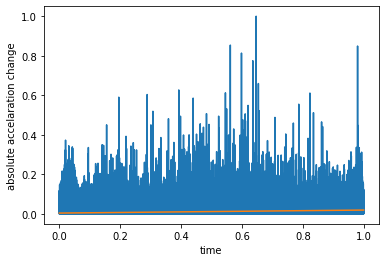

In [243]:
# Regression line in orange

plt.plot(x_test,y_test[:,0])
plt.plot(x_test,pred[:,0])
plt.ylabel("abs. horizonzal acc. change")
plt.xlabel("time")
plt.show()

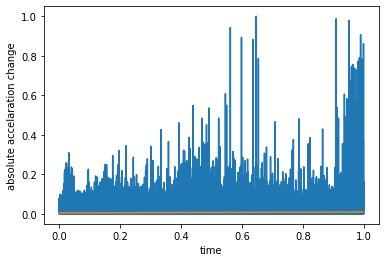

In [244]:
# Regression line in orange

plt.plot(x_test,y_test[:,1])
plt.plot(x_test,pred[:,1])
plt.ylabel("abs. vertical acc. change")
plt.xlabel("time")
plt.show()

In [245]:
# normalise absolute values between -1 and 1

normaliser = MinMaxScaler(feature_range=(-1,1))
NormTrainData = normaliser.fit_transform(trainData)
NormTestData = normaliser.fit_transform(testData)

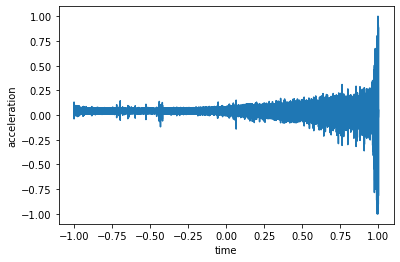

In [246]:
plt.plot(NormTrainData[:, 0],NormTrainData[:,1])
plt.ylabel("horizontal acceleration")
plt.xlabel("time")
plt.show()

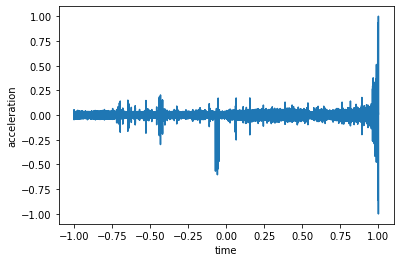

In [247]:
plt.plot(NormTrainData[:, 0],NormTrainData[:,2])
plt.ylabel("vertical acceleration")
plt.xlabel("time")
plt.show()

In [248]:
# prepare data
# 1d array for the x_values needs to be reshaped to a 2d array

x_train = NormTrainData[:,0]
x_train = x_train.reshape(-1,1)
y_train = NormTrainData[:,1:3]

x_test = NormTestData[:,0]
x_test = x_test.reshape(-1,1)
y_test = NormTestData[:,1:3]

In [249]:
# Fit linear regression to data with absolute values
regressor = LinearRegression()

regressor.fit(x_train,y_train)
pred = regressor.predict(x_test[:,:])
mse = mean_squared_error(y_test,pred)

print("Mean squared error:", mse)
print("R^2 score: ", r2_score(y_test,pred))

Mean squared error: 0.15435546586802995
R^2 score:  -149.243792432384


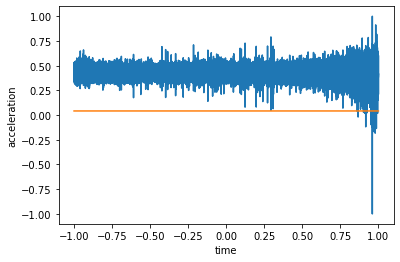

In [250]:
# Regression line in orange

plt.plot(x_test,y_test[:,0])
plt.plot(x_test,pred[:,0])
plt.ylabel("horizontal acceleration")
plt.xlabel("time")
plt.show()

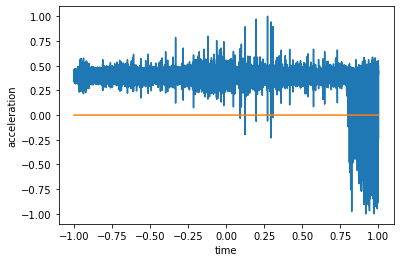

In [251]:
# Regression line in orange

plt.plot(x_test,y_test[:,1])
plt.plot(x_test,pred[:,1])
plt.ylabel("vertical acceleration")
plt.xlabel("time")
plt.show()